# ECE 204 - Pre Processing Notebook
By: Bret Sell, Manas Kanakala, Gabriel Chevrez

### Overview

This notebook performs the full preprocessing pipeline for our NCAA tournament modeling project.  
The steps include:

1. **Data Importation** – Load and examine three source datasets: team metrics, team rankings, and matchups  
2. **Initial Exploration** – Use summary statistics and visualizations to understand the structure and distribution of the data  
3. **Cleaning & Preprocessing** – Drop unnecessary columns, handle missing values, and verify data integrity  
4. **Merging Datasets** – Combine team metrics and rankings into unified datasets for training and 2025 prediction  
5. **Export Final Files** – Save four cleaned datasets for use in the final modeling notebook

All code is fully commented and supported with Markdown explanations for clarity and reproducibility.


In [2]:
# Imports
import pandas as pd

# Data Importation

In this section we load our raw tournament data into Pandas for initial inspection.

**Files loaded**  
- `KenPom Barttorvik.csv` (KenPom & Barttorvik metrics by team and year)  
- `Matchups.csv` (individual first‐round matchups, team names and seeds)
- `TeamRankings.csv` (Team rankings vs other teams and divisions.)

**Dataset structure**  
- Each row in `TeamRankings.csv` and `KenPom Barttorvik.csv` corresponds to a **team‐year** combination.  
- Each two rows in `Matchups.csv` corresponds to a **single game** in that round.



## Dataframe 1 - KenPom Barttorvik

### Preview first rows
Quickly inspect column names and sample values.

In [4]:
df1 = pd.read_csv("./data/original_dataset_KenPom Barttorvik.csv")
df1.head()

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
0,2025,MAC,17,66,2,1147,2,Akron,13,0,...,19,361,364,73,149,86,239,25,145,305
1,2025,SEC,28,66,2,1146,3,Alabama,2,0,...,1,57,4,261,32,211,92,9,174,1
2,2025,SWAC,31,68,4,1145,4,Alabama St.,16,0,...,154,285,239,83,251,270,61,227,147,253
3,2025,Pat,25,66,2,1144,6,American,16,0,...,349,303,248,181,364,58,34,218,163,329
4,2025,B12,7,66,2,1143,8,Arizona,4,0,...,52,74,129,225,16,18,143,25,87,3


View data types and count of non-null entries.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Columns: 103 entries, YEAR to ELITE SOS RANK
dtypes: float64(46), int64(55), object(2)
memory usage: 923.1+ KB


Separating 2025 data from training data from DataFrame 1

In [10]:
df1_model = df1[df1['YEAR'] != 2025]
df1_2025 = df1[df1['YEAR'] == 2025]
df1_model.head()

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
68,2024,MAC,17,61,1,1079,2,Akron,14,64,...,276,238,199,19,176,164,47,122,51,249
69,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,13,33,8,156,106,10,314,2,263,7
70,2024,P12,24,63,3,1077,8,Arizona,2,16,...,16,50,37,196,7,195,134,8,14,47
71,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,58,86,76,127,69,59,284,12,8,69
72,2024,B12,7,63,3,1075,14,Baylor,3,32,...,274,31,22,304,34,97,254,15,155,1


In [12]:
df1_2025.head()

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
0,2025,MAC,17,66,2,1147,2,Akron,13,0,...,19,361,364,73,149,86,239,25,145,305
1,2025,SEC,28,66,2,1146,3,Alabama,2,0,...,1,57,4,261,32,211,92,9,174,1
2,2025,SWAC,31,68,4,1145,4,Alabama St.,16,0,...,154,285,239,83,251,270,61,227,147,253
3,2025,Pat,25,66,2,1144,6,American,16,0,...,349,303,248,181,364,58,34,218,163,329
4,2025,B12,7,66,2,1143,8,Arizona,4,0,...,52,74,129,225,16,18,143,25,87,3


## Data Cleaning for df1 training and 2025 teams
Firstly, there are over 100 cols and some of them are repeated stats. We decided we wanted to remove all of the RANK fields and also removed Conference and different ID and NO as these were not stats that we want to train our model on.


In [15]:
rank_cols = [col for col in df1_model.columns if 'RANK' in col]
base_cols = [col.replace(' RANK', '') for col in rank_cols]
rank_cols_to_drop = [rank for rank, base in zip(rank_cols, base_cols) if base in df1_model.columns]
df1_model = df1_model.drop(columns=rank_cols_to_drop + ['TEAM ID', 'TEAM NO', 'CONF', 'CONF ID', 'QUAD NO', 'QUAD ID'])
df1_model.head()

,YEAR,TEAM,SEED,ROUND,K TEMPO,KADJ T,K OFF,KO RANK,KADJ O,K DEF,...,EXP,TALENT,FT%,OP FT%,PPPO,PPPD,ELITE SOS,WAB,EFGD% RANK,BADJT RANK
68,2024,Akron,14,64,66.7747,65.8933,107.841,122,107.009,99.7096,...,2.584,10.970,72.4,69.4,1.079,0.997,11.931,-4.5,78,276
69,2024,Alabama,4,4,74.1625,72.6461,121.712,2,125.601,108.0310,...,2.094,27.836,78.4,74.3,1.213,1.084,36.254,3.4,149,13
70,2024,Arizona,2,16,73.3760,71.8379,117.653,10,121.125,96.9086,...,1.963,76.342,71.9,71.1,1.178,0.967,29.931,4.9,81,16
71,2024,Auburn,4,64,70.9629,69.7887,117.364,14,120.579,95.7924,...,2.195,43.053,75.2,73.6,1.174,0.959,28.032,5.5,1,58
72,2024,Baylor,3,32,66.8428,65.6032,117.262,15,122.490,104.1660,...,1.617,58.436,74.0,73.0,1.171,1.042,37.902,5.1,233,274


In [17]:
rank_cols = [col for col in df1_2025.columns if 'RANK' in col]
base_cols = [col.replace(' RANK', '') for col in rank_cols]
rank_cols_to_drop = [rank for rank, base in zip(rank_cols, base_cols) if base in df1_2025.columns]
df1_2025 = df1_2025.drop(columns=rank_cols_to_drop + ['TEAM ID', 'TEAM NO', 'CONF', 'CONF ID', 'QUAD NO', 'QUAD ID'])
df1_2025.head()

,YEAR,TEAM,SEED,ROUND,K TEMPO,KADJ T,K OFF,KO RANK,KADJ O,K DEF,...,EXP,TALENT,FT%,OP FT%,PPPO,PPPD,ELITE SOS,WAB,EFGD% RANK,BADJT RANK
0,2025,Akron,13,0,72.4588,71.4456,115.754,21,113.749,104.558,...,2.383,16.228,74.9,73.0,1.156,1.045,9.759,-1.8,114,19
1,2025,Alabama,2,0,76.2512,74.9404,118.725,9,126.598,106.121,...,1.819,58.572,71.6,70.4,1.187,1.060,46.471,9.8,52,1
2,2025,Alabama St.,16,0,69.0571,67.8240,103.998,228,101.454,104.201,...,2.346,4.049,69.8,69.9,1.041,1.046,11.608,-10.2,150,154
3,2025,American,16,0,63.6519,63.5548,104.618,215,102.095,105.086,...,2.039,0.200,75.9,69.2,1.045,1.052,8.755,-8.3,245,349
4,2025,Arizona,4,0,70.2006,69.9324,115.408,27,122.567,102.537,...,1.920,66.268,78.4,71.4,1.156,1.025,44.259,5.4,79,52


Checking for any null or missing values in both dataframes. Also, verify that there are no duplicate rows.

In [20]:
print("Any nulls in training?", df1_model.isnull().sum().max()>0)
print("Any duplicates in training?", df1_model.duplicated().sum()>0)
print("Any nulls in 2025?", df1_2025.isnull().sum().max()>0)
print("Any duplicates in 2025?", df1_2025.duplicated().sum()>0)

Any nulls in training? False
Any duplicates in training? False
Any nulls in 2025? False
Any duplicates in 2025? False


### Summary Statistics of Numerical Features

As part of our initial data exploration, we generate descriptive statistics for all numerical variables.  
This helps us understand key properties of the dataset, including:

- Central tendency (**mean**, **median**)  
- Spread (**standard deviation**, **min/max**)  
- Potential outliers (via unusually large ranges)

In [23]:
df1_model.describe()

,YEAR,SEED,ROUND,K TEMPO,KADJ T,K OFF,KO RANK,KADJ O,K DEF,KD RANK,...,EXP,TALENT,FT%,OP FT%,PPPO,PPPD,ELITE SOS,WAB,EFGD% RANK,BADJT RANK
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,...,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,2015.806302,8.768304,43.962929,67.647758,66.204868,108.888541,72.140871,111.787603,97.533986,82.548656,...,1.826644,43.008173,71.325950,69.880816,1.089377,0.975303,23.463112,1.374171,91.044486,177.474513
std,4.926973,4.671994,22.906734,3.153387,3.154106,5.021350,64.861710,5.990357,4.571650,69.163845,...,0.411093,28.903572,3.616268,2.603507,0.050139,0.045467,8.810155,4.776338,74.358181,103.601729
min,2008.000000,1.000000,1.000000,57.008600,56.891000,90.689600,1.000000,90.890400,83.484300,1.000000,...,0.189000,0.200000,59.600000,62.100000,0.907000,0.834000,5.045000,-15.600000,1.000000,1.000000
25%,2012.000000,5.000000,32.000000,65.506050,64.120000,105.585500,22.000000,108.123500,94.468500,27.000000,...,1.563500,13.395000,68.900000,68.100000,1.056000,0.945000,14.830000,-1.100000,31.000000,86.000000
50%,2016.000000,9.000000,64.000000,67.621100,66.118300,108.872000,52.000000,111.961000,97.689100,64.000000,...,1.840000,47.440000,71.400000,69.900000,1.089000,0.977000,25.539000,1.700000,72.000000,176.000000
75%,2021.000000,13.000000,64.000000,69.821000,68.441500,112.371000,107.000000,115.918000,100.633000,123.000000,...,2.102000,67.935000,73.900000,71.600000,1.124000,1.006000,30.765000,4.400000,134.000000,264.000000
max,2024.000000,16.000000,68.000000,76.825300,76.121900,123.829000,342.000000,127.384000,112.757000,336.000000,...,2.859000,95.962000,82.600000,78.700000,1.241000,1.121000,40.223000,13.100000,357.000000,362.000000


### Variable Overview

The dataset contains a mix of categorical and numerical features:

**Categorical Variables**
- `YEAR` – Season year
- `TEAM` – Team name
- `SEED` – NCAA tournament seed
- `ROUND` – Tournament round

**Numerical Variables**
- `K TEMPO` – Adjusted tempo
- `KADJ T` – Adjusted total rating
- `K OFF` – Adjusted offensive rating
- `KO RANK` – Offensive ranking
- `KADJ O` – Adjusted offense efficiency
- `K DEF` – Adjusted defense rating

**Note on Outliers**  
After reviewing the summary statistics, we found no extreme or invalid outliers that warranted removal. All values appear to reflect realistic ranges for team performance and are retained for modeling as-is.


## Dataframe 2 - Tournament Matchups
### Preview first rows
Quickly inspect column names and sample values.

In [27]:
df2 = pd.read_csv("./data/original_dataset_Tournament Matchups.csv")
pd.set_option('display.max_rows', None)
df2.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE
0,2025,2162,2166,1141,Auburn,1,1,64,NaN
1,2025,2161,2165,1145,Alabama St.,16,64,64,NaN
2,2025,2160,2164,1141,Auburn,1,1,64,NaN
3,2025,2159,2163,1099,Saint Francis,16,64,64,NaN
4,2025,2158,2162,1119,Louisville,8,1,64,NaN


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           2162 non-null   int64  
 1   BY YEAR NO     2162 non-null   int64  
 2   BY ROUND NO    2162 non-null   int64  
 3   TEAM NO        2162 non-null   int64  
 4   TEAM           2162 non-null   object 
 5   SEED           2162 non-null   int64  
 6   ROUND          2162 non-null   int64  
 7   CURRENT ROUND  2162 non-null   int64  
 8   SCORE          2014 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 152.1+ KB


### Remove Early 2025 Games

We remove the first four games from the 2025 tournament data (8 rows total) because they were play-in games that caused duplicate matchups in the Round of 64.  
These games do not align with the rest of our modeling, which focuses on the main bracket.




In [32]:
# Removing the first four from the dataset
df2 = df2.drop(index = [2, 3, 10, 11, 36, 37, 62, 63])

### Prepare Matchups for Modeling

We split the dataset into two parts:
- `df_train`: Tournament matchups from **all years except 2025** (used for training)
- `df_2025`: Matchups from **2025** (for testing/prediction only, no scores or winners available)

The `prep_matchups()` function:
- Pairs each two consecutive rows as one matchup (Team 1 vs. Team 2)
- Assigns a unique `MATCHUP_ID` to each pair
- Computes the `WIN` column (for training only)
- Drops unnecessary columns and reorders data


In [35]:
df_2025 = df2[df2['YEAR'] == 2025].reset_index(drop=True)
df_train = df2[df2['YEAR'] != 2025].reset_index(drop=True)

# Function to Pair and Prepare Matchups
def prep_matchups(data, is_2025=False):
    data = data.copy().reset_index(drop=True)
    data['PAIR_ID'] = data.index // 2

    team1 = data.iloc[::2].reset_index(drop=True)
    team2 = data.iloc[1::2].reset_index(drop=True)

    if not is_2025:
        # Only calculate WIN if scores exist
        team1['WIN'] = (team1['SCORE'] > team2['SCORE']).astype(int)
        team2['WIN'] = (team2['SCORE'] > team1['SCORE']).astype(int)
    else:
        # Leave WIN and SCORE blank for 2025
        team1['WIN'] = pd.NA
        team2['WIN'] = pd.NA
        team1['SCORE'] = pd.NA
        team2['SCORE'] = pd.NA

    team1['MATCHUP_ID'] = team1.index
    team2['MATCHUP_ID'] = team2.index

    team1_clean = team1[['YEAR', 'TEAM', 'CURRENT ROUND', 'SCORE', 'WIN', 'MATCHUP_ID']]
    team2_clean = team2[['YEAR', 'TEAM', 'CURRENT ROUND', 'SCORE', 'WIN', 'MATCHUP_ID']]


    matchup_prepped = pd.concat([team1_clean, team2_clean], axis=0).reset_index(drop=True)

    if not is_2025:
        matchup_prepped = matchup_prepped.sort_values(['MATCHUP_ID', 'WIN'], ascending=[True, False]).reset_index(drop=True)
    else:
        matchup_prepped = matchup_prepped.sort_values(['MATCHUP_ID']).reset_index(drop=True)

    return matchup_prepped

# Apply Function to Both Training and 2025
matchup_prepped_train = prep_matchups(df_train, is_2025=False)
matchup_prepped_2025 = prep_matchups(df_2025, is_2025=True)

matchup_prepped_train.head()

,YEAR,TEAM,CURRENT ROUND,SCORE,WIN,MATCHUP_ID
0,2024,Connecticut,64,91.0,1,0
1,2024,Stetson,64,52.0,0,0
2,2024,Northwestern,64,77.0,1,1
3,2024,Florida Atlantic,64,65.0,0,1
4,2024,San Diego St.,64,69.0,1,2


In [37]:
matchup_prepped_2025.head()

,YEAR,TEAM,CURRENT ROUND,SCORE,WIN,MATCHUP_ID
0,2025,Auburn,64,NaN,NaN,0
1,2025,Alabama St.,64,NaN,NaN,0
2,2025,Louisville,64,NaN,NaN,1
3,2025,Creighton,64,NaN,NaN,1
4,2025,Michigan,64,NaN,NaN,2


### Summary Statistics of Numerical Features

As part of our initial data exploration, we generate descriptive statistics for all numerical variables.  
This helps us understand key properties of the dataset, including:

- Central tendency (**mean**, **median**)  
- Spread (**standard deviation**, **min/max**)  
- Potential outliers (via unusually large ranges)


In [40]:
matchup_prepped_train.describe()

,YEAR,CURRENT ROUND,SCORE,WIN,MATCHUP_ID
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
mean,2015.744786,43.312810,69.601291,0.500000,503.000000
std,4.944341,22.366421,11.979549,0.500124,290.767913
min,2008.000000,2.000000,29.000000,0.000000,0.000000
25%,2011.250000,32.000000,61.000000,0.000000,251.250000
50%,2015.000000,64.000000,69.000000,0.500000,503.000000
75%,2019.000000,64.000000,77.750000,1.000000,754.750000
max,2024.000000,64.000000,113.000000,1.000000,1006.000000


### Variable Overview – Tournament Matchups

This dataset contains matchup-level information for NCAA tournament games.  
Below is a summary of the variable types:

**Categorical Variables**
- `YEAR` – Season year    
- `TEAM` – Team name   
- `CURRENT ROUND` – Round number (numeric label treated as category)
- `MATCHUP_ID` – Unique identifier for each game pair
- `WIN` – Binary outcome (1 if the team won the matchup, 0 if lost; blank for 2025)

**Numerical Variable**
- `SCORE` – Final score for the team in the matchup

**Note on Outliers**  
After examining the distribution of scores, we found no invalid or extreme outliers. All values reflect realistic tournament results and were retained for modeling.


### Final Data Integrity Check

Before saving and using the matchup datasets, we verify that they are clean and ready for modeling:

- Check for any remaining **null values**  
- Check for **duplicate rows** that could affect training or evaluation

In [44]:
print("Any nulls in training?", matchup_prepped_train.isnull().sum().max()>0)
print("Any duplicates in training?", matchup_prepped_train.duplicated().sum()>0)
print("Any nulls in 2025?", matchup_prepped_2025.isnull().sum().max()>0)
print("Any duplicates in 2025?", matchup_prepped_2025.duplicated().sum()>0)

Any nulls in training? False
Any duplicates in training? False
Any nulls in 2025? True
Any duplicates in 2025? False


### Expected Nulls in 2025 Data

The 2025 matchup data is used for prediction only, so it’s expected that the `SCORE` and `WIN` columns contain null values.  
We verify that no other columns have missing data.

In [47]:
print(matchup_prepped_2025.isnull().sum()[matchup_prepped_2025.isnull().sum() > 0])

SCORE    140
WIN      140
dtype: int64


Finally, we save the cleaned matchups to:
- `cleaned_matchups.csv` — training data with labeled winners  
- `cleaned_2025_matchups.csv` — testing data with no outcomes

In [50]:
matchup_prepped_train.to_csv('./data/cleaned_matchups.csv', index=False)
matchup_prepped_2025.to_csv('./data/cleaned_2025_matchups.csv', index=False)

## Dataframe 3 - TeamRankings.csv
###Preview first rows
Quickly inspect column names and sample values

In [53]:
df3 = pd.read_csv("./data/original_dataset_TeamRankings.csv")
df3.head()

,YEAR,TEAM NO,TEAM,SEED,ROUND,TR RANK,TR RATING,V 1-25 WINS,V 1-25 LOSS,V 26-50 WINS,...,CONSISTENCY TR RATING,CONSISTENCY V 1-25 WINS,CONSISTENCY V 1-25 LOSS,CONSISTENCY V 26-50 WINS,CONSISTENCY V 26-50 LOSS,CONSISTENCY V 51-100 WINS,CONSISTENCY V 51-100 LOSS,CONSISTENCY HI,CONSISTENCY LO,CONSISTENCY LAST
0,2025,1147,Akron,13,0,106,4.4,0,0,0,...,9.6,0,0,0,0,3,0,12,339,118
1,2025,1146,Alabama,2,0,5,22.5,7,5,8,...,12.4,2,0,0,0,5,0,1,361,332
2,2025,1145,Alabama St.,16,0,279,-6.6,0,0,0,...,9.3,0,1,0,1,3,4,22,324,80
3,2025,1144,American,16,0,241,-4.5,0,0,0,...,10.6,0,0,1,1,2,1,37,332,225
4,2025,1143,Arizona,4,0,10,20.1,7,9,2,...,10.4,2,0,1,0,3,3,5,364,215


In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR                       1147 non-null   int64  
 1   TEAM NO                    1147 non-null   int64  
 2   TEAM                       1147 non-null   object 
 3   SEED                       1147 non-null   int64  
 4   ROUND                      1147 non-null   int64  
 5   TR RANK                    1147 non-null   int64  
 6   TR RATING                  1147 non-null   float64
 7   V 1-25 WINS                1147 non-null   int64  
 8   V 1-25 LOSS                1147 non-null   int64  
 9   V 26-50 WINS               1147 non-null   int64  
 10  V 26-50 LOSS               1147 non-null   int64  
 11  V 51-100 WINS              1147 non-null   int64  
 12  V 51-100 LOSS              1147 non-null   int64  
 13  HI                         1147 non-null   int64

Separating 2025 data and training data from DataFrame 3

In [58]:
df3_model = df3[df3['YEAR'] != 2025]
df3_2025 = df3[df3['YEAR'] == 2025]

### Summary Statistics of Numerical Features

As part of our initial data exploration, we generate descriptive statistics for all numerical variables.  
This helps us understand key properties of the dataset, including:

- Central tendency (**mean**, **median**)  
- Spread (**standard deviation**, **min/max**)  
- Potential outliers (via unusually large ranges)

In [61]:
df3_model.describe()

,YEAR,TEAM NO,SEED,ROUND,TR RANK,TR RATING,V 1-25 WINS,V 1-25 LOSS,V 26-50 WINS,V 26-50 LOSS,...,CONSISTENCY TR RATING,CONSISTENCY V 1-25 WINS,CONSISTENCY V 1-25 LOSS,CONSISTENCY V 26-50 WINS,CONSISTENCY V 26-50 LOSS,CONSISTENCY V 51-100 WINS,CONSISTENCY V 51-100 LOSS,CONSISTENCY HI,CONSISTENCY LO,CONSISTENCY LAST
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,...,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,2015.806302,540.000000,8.768304,43.962929,60.249305,12.815755,1.995366,2.741427,2.443003,1.680259,...,10.076274,1.229842,0.474513,1.211307,0.437442,2.502317,0.857275,19.191844,300.367933,173.090825
std,4.926973,311.624774,4.671994,22.906734,61.948374,7.604196,2.205360,2.285888,2.440430,1.489197,...,1.334407,1.481174,0.853373,1.475157,0.765397,2.365049,1.070788,30.050596,49.438263,100.878723
min,2008.000000,1.000000,1.000000,1.000000,1.000000,-8.200000,0.000000,0.000000,0.000000,0.000000,...,6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,75.000000,2.000000
25%,2012.000000,270.500000,5.000000,32.000000,17.500000,8.700000,0.000000,1.000000,0.000000,0.000000,...,9.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,276.500000,84.500000
50%,2016.000000,540.000000,9.000000,64.000000,37.000000,13.400000,1.000000,2.000000,2.000000,1.000000,...,10.100000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,4.000000,315.000000,177.000000
75%,2021.000000,809.500000,13.000000,64.000000,82.000000,18.100000,3.000000,4.000000,4.000000,3.000000,...,11.000000,2.000000,1.000000,2.000000,1.000000,4.000000,1.000000,26.000000,337.000000,257.000000
max,2024.000000,1079.000000,16.000000,68.000000,311.000000,32.600000,11.000000,10.000000,12.000000,8.000000,...,15.000000,8.000000,5.000000,9.000000,4.000000,12.000000,6.000000,319.000000,363.000000,362.000000


This dataset includes team-level performance metrics used to model tournament outcomes.

**Categorical Variables**
- `YEAR` – Season year  
- `TEAM` – Team name  
- `SEED` – NCAA tournament seed  
- `ROUND` – Tournament round

**Numerical Variables**
- `TR RANK` – Team ranking (lower is better)  
- `TR RATING` – Overall team rating  
- `V 1-25 WINS` – Wins vs. top 25 teams  
- `V 1-25 LOSS` – Losses vs. top 25 teams  
- `V 26-50 WINS` – Wins vs. teams ranked 26–50  
- `V 26-50 LOSS` – Losses vs. teams ranked 26–50  
- `V 51-100 LOSS` – Losses vs. teams ranked 51–100

**Note on Outliers**  
All numerical values fall within expected ranges based on team performance.  
No extreme or invalid outliers were found, so the data was retained without modification.

### Final Data Integrity Check

Before saving and using the matchup datasets, we verify that they are clean and ready for modeling:

- Check for any remaining **null values**  
- Check for **duplicate rows** that could affect training or evaluation

In [65]:
print("Any nulls in training?", df3_model.isnull().sum().max()>0)
print("Any duplicates in training?", df3_model.duplicated().sum()>0)
print("Any nulls in 2025?", df3_2025.isnull().sum().max()>0)
print("Any duplicates in 2025?", df3_2025.duplicated().sum()>0)

Any nulls in training? False
Any duplicates in training? False
Any nulls in 2025? False
Any duplicates in 2025? False


### Merge Team Statistics with Rankings Data

We combine the cleaned team statistics (`df1_model` / `df1_2025`) with the tournament ranking metrics (`df3_model` / `df3_2025`) for both training and 2025 data.

- Merged on: `YEAR`, `TEAM`, `ROUND`, and `SEED`
- Join type: **Inner join** to keep only records that exist in both datasets

This ensures that each team in a given round has both performance metrics and ranking data available for modeling.


In [68]:
# Merge model data
df_model_merged = pd.merge(df1_model, df3_model, on=["YEAR", "TEAM", "ROUND", "SEED"], how="inner")

# Merge 2025 data
df_2025_merged = pd.merge(df1_2025, df3_2025, on=["YEAR", "TEAM", "ROUND", "SEED"], how="inner")

print("KenPom model shape:", df1_model.shape)
print("Team Ranking model shape:", df3_2025.shape)
print("KenPom 2025 shape:", df1_2025.shape)
print("Team Ranking 2025 shape:", df3_2025.shape)
print("Model data merged shape:", df_model_merged.shape)
print("2025 data merged shape:", df_2025_merged.shape)
print("No rows or cols are lost during the merge")

df_model_merged.head()

KenPom model shape: (1079, 57)
Team Ranking model shape: (68, 43)
KenPom 2025 shape: (68, 57)
Team Ranking 2025 shape: (68, 43)
Model data merged shape: (1079, 96)
2025 data merged shape: (68, 96)
No rows or cols are lost during the merge


,YEAR,TEAM,SEED,ROUND,K TEMPO,KADJ T,K OFF,KO RANK,KADJ O,K DEF,...,CONSISTENCY TR RATING,CONSISTENCY V 1-25 WINS,CONSISTENCY V 1-25 LOSS,CONSISTENCY V 26-50 WINS,CONSISTENCY V 26-50 LOSS,CONSISTENCY V 51-100 WINS,CONSISTENCY V 51-100 LOSS,CONSISTENCY HI,CONSISTENCY LO,CONSISTENCY LAST
0,2024,Akron,14,64,66.7747,65.8933,107.841,122,107.009,99.7096,...,8.4,0,0,2,1,2,2,8,232,23
1,2024,Alabama,4,4,74.1625,72.6461,121.712,2,125.601,108.0310,...,13.5,2,1,2,0,0,0,4,361,360
2,2024,Arizona,2,16,73.3760,71.8379,117.653,10,121.125,96.9086,...,13.3,2,2,0,0,1,0,8,359,359
3,2024,Auburn,4,64,70.9629,69.7887,117.364,14,120.579,95.7924,...,11.4,3,0,4,0,1,1,23,346,305
4,2024,Baylor,3,32,66.8428,65.6032,117.262,15,122.490,104.1660,...,9.6,3,1,0,1,2,0,10,354,96


### Save Final Cleaned Datasets

We export the merged and fully preprocessed datasets for future use in modeling:

- `cleaned_model_dataset.csv` — includes all historical training data with full features  
- `cleaned_2025_dataset.csv` — includes 2025 teams for prediction (with no outcome labels)

These files will serve as inputs for our modeling and evaluation notebooks.

In [71]:
# Save the merged model data
df_model_merged.to_csv("./data/cleaned_model_dataset.csv", index=False)

# Save the merged 2025 data
df_2025_merged.to_csv("./data/cleaned_2025_dataset.csv", index=False)

## Visual Exploration of the Data

We use two **scatter plots** to explore how specific performance metrics relate to tournament success:

- **Scatter Plot 1 – 3-Point Percentage vs. Round**  
  This plot shows whether teams with higher 3-point shooting percentages tend to advance further in the tournament. It helps assess if perimeter shooting efficiency is correlated with deeper runs.

- **Scatter Plot 2 – Defensive Efficiency vs. Round**  
  This plot examines whether strong defensive teams are more likely to succeed. Lower defensive efficiency values indicate better performance, so this plot can reveal if defense is a key driver of tournament advancement.

These visualizations help us identify performance traits that are common among winning teams.


We will plot 3 point percentage for teams that made it past the round of 32 versus round of 64, final four, etc.


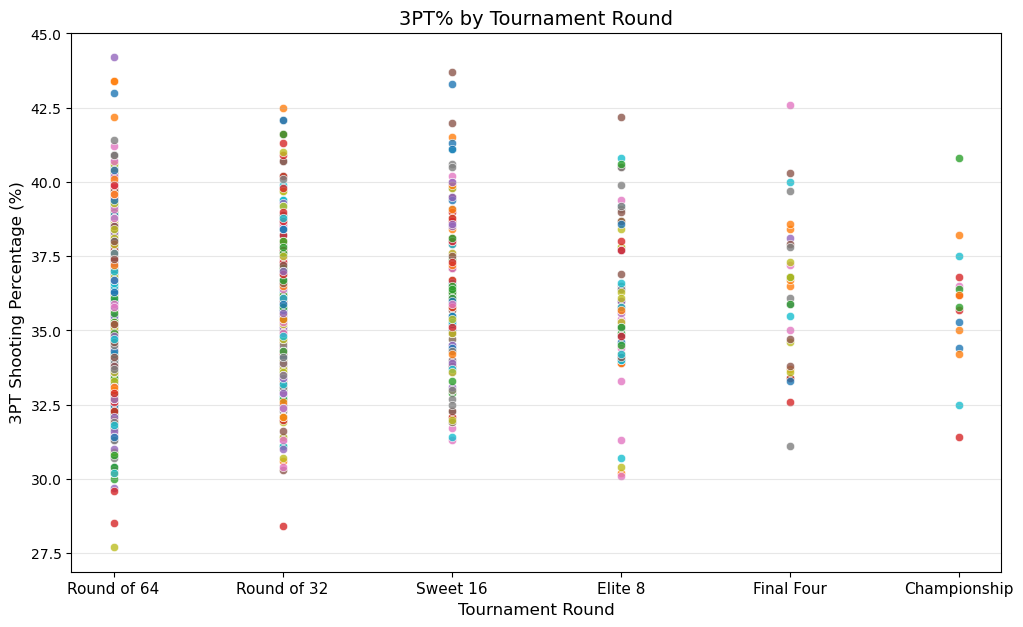

In [75]:
df_three_pt_impact = df1_model[["YEAR", "TEAM", "SEED", "ROUND", "3PT%"]]
import matplotlib.pyplot as plt
import numpy as np

round_mapping = {
    64: 1,
    32: 2,
    16: 3,
    8: 4,
    4: 5,
    2: 6
}

df_clean = df_three_pt_impact.dropna(subset=["ROUND", "3PT%", "YEAR"]).copy()
df_clean['ROUND_STANDARD'] = df_clean['ROUND'].map(round_mapping)
df_main = df_clean[df_clean['ROUND_STANDARD'].between(1, 6)]

plt.figure(figsize=(12, 7))

for _, row in df_main.iterrows():
    plt.scatter(
        x=row['ROUND_STANDARD'],
        y=row['3PT%'],
        alpha=0.8,
        edgecolor='white',
        linewidth=0.5
    )

round_labels = {
    1: "Round of 64",
    2: "Round of 32",
    3: "Sweet 16",
    4: "Elite 8",
    5: "Final Four",
    6: "Championship"
}

plt.xticks(
    ticks=list(round_labels.keys()),
    labels=list(round_labels.values()),
    fontsize=11

)


plt.xlabel("Tournament Round", fontsize=12)
plt.ylabel("3PT Shooting Percentage (%)", fontsize=12)
plt.title("3PT% by Tournament Round", fontsize=14)
plt.grid(axis='y', alpha=0.3)

plt.show()

In [76]:
df_three_pt_impact = df1_model[["YEAR", "TEAM", "SEED", "ROUND", "3PT%"]]
print(df_three_pt_impact.groupby('ROUND')['3PT%'].describe())


       count       mean       std   min     25%    50%     75%   max
ROUND                                                               
1       16.0  37.350000  2.582763  33.1  35.650  37.20  38.975  41.8
2       16.0  35.806250  2.183107  31.4  34.850  36.00  36.575  40.8
4       32.0  36.278125  2.518798  31.1  34.400  36.60  37.825  42.6
8       64.0  36.103125  2.652999  30.1  34.475  35.80  37.850  42.2
16     128.0  36.248437  2.609039  31.3  34.500  35.95  37.925  43.7
32     256.0  35.730859  2.540145  28.4  33.900  35.70  37.425  42.5
64     512.0  35.718945  2.637679  27.7  33.900  35.60  37.600  44.2
68      55.0  34.580000  3.107244  26.5  32.900  34.50  36.750  39.7


We can observe a general trend of the 3pt shooting percentages improving as we move further up rounds. We can also see that teams that won the championship tended to have higher 3pt shooting than teams that made it to any other round. There aren't any real outliers or anomalies in this as most of the data is relatively uniform.

We will also plot defensive ratings for the teams that made it past the round of 32 versus round of 64, final four, etc.

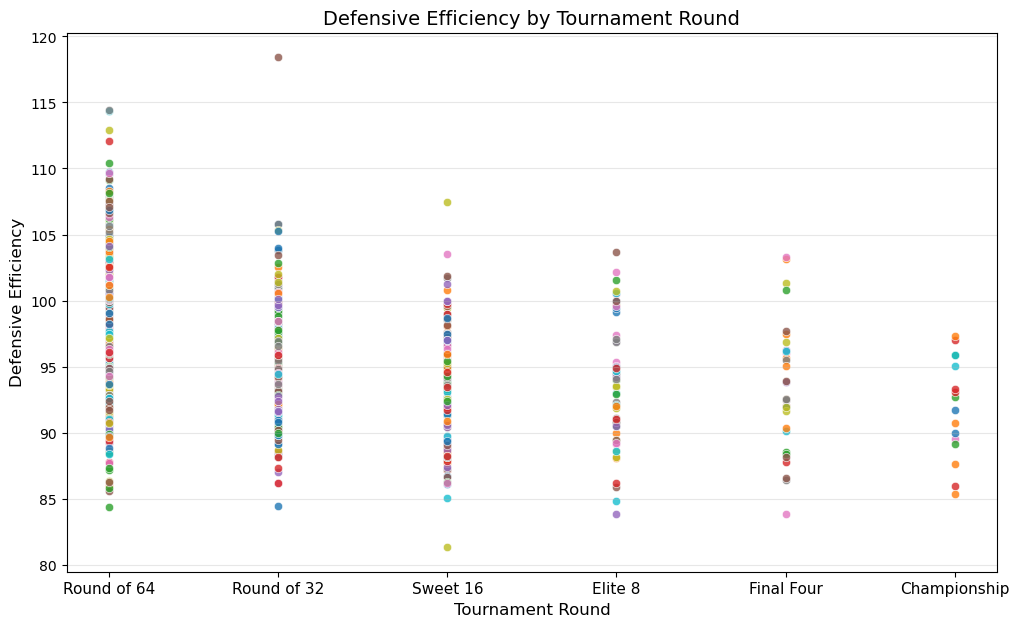

In [79]:
df_defensive_impact = df1_model[["YEAR", "TEAM", "SEED", "ROUND", "KADJ D"]]
import matplotlib.pyplot as plt
import numpy as np

round_mapping = {
    64: 1,
    32: 2,
    16: 3,
    8: 4,
    4: 5,
    2: 6
}

df_clean = df_defensive_impact.dropna(subset=["ROUND", "KADJ D", "YEAR"]).copy()
df_clean['ROUND_STANDARD'] = df_clean['ROUND'].map(round_mapping)
df_main = df_clean[df_clean['ROUND_STANDARD'].between(1, 6)]

plt.figure(figsize=(12, 7))

for _, row in df_main.iterrows():
    plt.scatter(
        x=row['ROUND_STANDARD'],
        y=row['KADJ D'],
        alpha=0.8,
        edgecolor='white',
        linewidth=0.5
    )

round_labels = {
    1: "Round of 64",
    2: "Round of 32",
    3: "Sweet 16",
    4: "Elite 8",
    5: "Final Four",
    6: "Championship"
}

plt.xticks(
    ticks=list(round_labels.keys()),
    labels=list(round_labels.values()),
    fontsize=11

)


plt.xlabel("Tournament Round", fontsize=12)
plt.ylabel("Defensive Efficiency", fontsize=12)
plt.title("Defensive Efficiency by Tournament Round", fontsize=14)
plt.grid(axis='y', alpha=0.3)

plt.show()

In [80]:
df_defensive_impact = df1_model[["YEAR", "TEAM", "SEED", "ROUND", "KADJ D"]]
print(df_defensive_impact.groupby('ROUND')['KADJ D'].describe())
print("Outlier: \n" ,df_defensive_impact[df_defensive_impact['ROUND'] == 32].sort_values(by= 'KADJ D')[-1:])

       count        mean       std      min        25%        50%         75%  \
ROUND                                                                           
1       16.0   91.702050  3.588160  83.1717  88.607725   93.43425   94.073250   
2       16.0   91.880212  3.794853  85.3169  89.402375   92.19195   95.255900   
4       32.0   93.459287  4.822027  83.8367  90.301350   92.55895   96.203250   
8       64.0   93.441788  4.489782  83.8490  90.560575   92.95905   95.715325   
16     128.0   93.697688  4.375843  81.3187  90.542775   94.03995   96.711600   
32     256.0   95.458410  4.194995  84.4292  92.650450   95.04675   97.777800   
64     512.0   98.632933  5.138483  84.3753  95.076400   98.67215  102.541000   
68      55.0  102.167218  6.004346  91.3344  97.688050  101.83500  106.027500   

            max  
ROUND            
1       95.9749  
2       97.2780  
4      103.3190  
8      103.7090  
16     107.4400  
32     118.4250  
64     114.4500  
68     114.5830  
Outlier: 

We can see the data above illustrating that the adjusted defensive stat trends down over time which makes sense as this shows that better defensive teams are surviving till later rounds. Additionally, we can also see that the biggest outlier, Fairleigh Dickinson was a 16 seed that made it past the first round which made sense for why it had such a poor defensive rating.

## Preprocessing Complete

The preprocessing pipeline is now complete. We have generated four clean and structured datasets:

- `cleaned_model_dataset.csv` – Historical data with merged team stats and rankings  
- `cleaned_2025_dataset.csv` – 2025 teams for predictions, with no labels  
- `prepped_matchups.csv` – First-round matchups for training with WIN labels  
- `prepped_2025_matchups.csv` – First-round matchups for 2025 without outcome labels

These files are ready for use in the final modeling notebook, where we will build and evaluate our predictive models.

Through initial data exploration and visual analysis, we also identified promising trends — such as strong defensive efficiency and 3-point shooting being linked to deeper tournament runs. These insights will help guide our feature selection and model design in the final notebook.
